Se planea hacer un modelo predictivo utilizando tecnicas de machine learning para la prediccion de:

La probabilidad de que ocurra un crimen en una zona específicada en la ciudad de Bucaramanga y la probabilidad de la modalidad del crimen.

Clasificar la zona en diferentes categorías de seguridad, como "Alta seguridad", "Moderada seguridad", "Baja seguridad", etc.



LIBRERIAS A USAR

In [1]:

# Pandas para manejo de datos
import pandas as pd


# MatplotLib para grafos
import matplotlib.pyplot as plt

# Seaborn para grafos
import seaborn as sns

# Numpy para manejo de datos
import numpy as np
from numpy import dtype
from scipy.sparse.csgraph import depth_first_tree

# MinMaxScaler para normalizacion de datos
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'scipy'

CARGAR DATOS

In [2]:
        # Url de los datos 
url = "https://drive.google.com/uc?id=1-d1pn2OhZeaqiuUNtr6zAIXyXTHo3X7s&export=download"

# Convertir a DataFrame con pandas
df = pd.read_csv(url, low_memory=False)


EDA DE LA TABLA PRINCIPAL


///////////////////// TABLA ////////////////////////////////////

In [3]:

# Mostra el tipo de dato de cada columna
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DESCRIPCION_CONDUCTA  100993 non-null  object
 1   ARMAS_MEDIOS          100993 non-null  object
 2   BARRIOS_HECHO         100993 non-null  object
 3   FECHA_HECHO           100993 non-null  object
 4   HORA_HECHO            100993 non-null  object
 5   EDAD                  100360 non-null  object
 6   SEXO                  100993 non-null  object
 7   MOVIL_VICTIMA         100993 non-null  object
 8   MOVIL_AGRESOR         100993 non-null  object
 9   CLASE_SITIO           100993 non-null  object
 10  ARTICULO              100993 non-null  object
 11  DELITO_SOLO           100993 non-null  object
 12  CURSO_VIDA            100993 non-null  object
 13  CURSO_VIDA_ORDEN      100993 non-null  int64 
 14  AÑO_NUM               100993 non-null  int64 
 15  MES_NUM          

In [4]:
# Mostrar las primeras filas del DataFrame
df.head()


,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,SEXO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,DIA_NUM,RANGO_HORARIO,TIPOLOGÍA,RANGO_HORARIO_ORDEN,DIA_NOMBRE,DIA_NOMBRE_ORDEN,LOCALIDAD,NUM_COM,NOM_COM,CANTIDAD_UNICA
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,20:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,17,20:00-20:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,20,lunes,1,11. SUR,11,SUR,1
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,GRANJAS DE PROVENZA,2019-09-12,01:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,1:00-1:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,1,jueves,4,10. PROVENZA,10,PROVENZA,1
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,2019-04-07,05:10:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,7,5:00-5:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,5,domingo,7,10. PROVENZA,10,PROVENZA,1
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,23:15:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,30,23:00-23:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,23,miércoles,3,11. SUR,11,SUR,1
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,2019-06-12,14:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,14:00-14:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,14,miércoles,3,10. PROVENZA,10,PROVENZA,1


///////////////////// COLUMNAS ////////////////////////////////////


In [5]:
df.columns

Index(['DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'FECHA_HECHO',
       'HORA_HECHO', 'EDAD', 'SEXO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR',
       'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'RANGO_HORARIO_ORDEN', 'DIA_NOMBRE', 'DIA_NOMBRE_ORDEN',
       'LOCALIDAD', 'NUM_COM', 'NOM_COM', 'CANTIDAD_UNICA'],
      dtype='object')

In [6]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} Valores diferentes")

DESCRIPCION_CONDUCTA: 41 Valores diferentes
ARMAS_MEDIOS: 40 Valores diferentes
BARRIOS_HECHO: 327 Valores diferentes
FECHA_HECHO: 2861 Valores diferentes
HORA_HECHO: 1415 Valores diferentes
EDAD: 99 Valores diferentes
SEXO: 3 Valores diferentes
MOVIL_VICTIMA: 14 Valores diferentes
MOVIL_AGRESOR: 15 Valores diferentes
CLASE_SITIO: 231 Valores diferentes
ARTICULO: 30 Valores diferentes
DELITO_SOLO: 41 Valores diferentes
CURSO_VIDA: 19 Valores diferentes
CURSO_VIDA_ORDEN: 19 Valores diferentes
AÑO_NUM: 8 Valores diferentes
MES_NUM: 12 Valores diferentes
DIA_NUM: 31 Valores diferentes
RANGO_HORARIO: 24 Valores diferentes
TIPOLOGÍA: 6 Valores diferentes
RANGO_HORARIO_ORDEN: 24 Valores diferentes
DIA_NOMBRE: 7 Valores diferentes
DIA_NOMBRE_ORDEN: 7 Valores diferentes
LOCALIDAD: 21 Valores diferentes
NUM_COM: 21 Valores diferentes
NOM_COM: 21 Valores diferentes
CANTIDAD_UNICA: 1 Valores diferentes


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CURSO_VIDA_ORDEN,100993.0,7.607795,4.345098,0.0,5.0,6.0,9.0,18.0
AÑO_NUM,100993.0,2019.703197,2.258035,2016.0,2018.0,2020.0,2022.0,2023.0
MES_NUM,100993.0,6.471379,3.425133,1.0,3.0,7.0,9.0,12.0
DIA_NUM,100993.0,15.636490,8.839196,1.0,8.0,16.0,23.0,31.0
RANGO_HORARIO_ORDEN,100993.0,12.512659,6.231053,0.0,8.0,13.0,18.0,23.0
DIA_NOMBRE_ORDEN,100993.0,3.995623,1.977476,1.0,2.0,4.0,6.0,7.0
NUM_COM,100993.0,8.706643,5.272817,1.0,4.0,10.0,13.0,21.0
CANTIDAD_UNICA,100993.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
DESCRIPCION_CONDUCTA,100993,41,ARTÍCULO 239. HURTO PERSONAS,45944
ARMAS_MEDIOS,100993,40,SIN EMPLEO DE ARMAS,46959
BARRIOS_HECHO,100993,327,CENTRO,8532
FECHA_HECHO,100993,2861,2022-09-08,83
HORA_HECHO,100993,1415,10:00:00,3468
EDAD,100360,98,NO DISPONIBLE,8836
SEXO,100993,3,FEMENINO,46749
MOVIL_VICTIMA,100993,14,A PIE,87476
MOVIL_AGRESOR,100993,15,A PIE,77587
CLASE_SITIO,100993,231,VIAS PUBLICAS,49376


In [10]:
missing_values = df.isnull().sum()

# Mostrar el número de valores nulos por columna
print("Número de valores nulos por columna:")
print(missing_values)

Número de valores nulos por columna:
DESCRIPCION_CONDUCTA      0
ARMAS_MEDIOS              0
BARRIOS_HECHO             0
FECHA_HECHO               0
HORA_HECHO                0
EDAD                    633
SEXO                      0
MOVIL_VICTIMA             0
MOVIL_AGRESOR             0
CLASE_SITIO               0
ARTICULO                  0
DELITO_SOLO               0
CURSO_VIDA                0
CURSO_VIDA_ORDEN          0
AÑO_NUM                   0
MES_NUM                   0
DIA_NUM                   0
RANGO_HORARIO             0
TIPOLOGÍA                 1
RANGO_HORARIO_ORDEN       0
DIA_NOMBRE                0
DIA_NOMBRE_ORDEN          0
LOCALIDAD                 0
NUM_COM                   0
NOM_COM                   0
CANTIDAD_UNICA            0
dtype: int64


Se encuentra un valor nulo en la tipologia y 633 en edad

In [9]:
print(f"Categorias y recuento: \n",df.ARMAS_MEDIOS.value_counts())
print("Total de categorias: ",df.ARMAS_MEDIOS.unique().shape)
print("Recuento de valores: ", df.ARMAS_MEDIOS.value_counts().sum())

print("Valores nulos o no reportados:", df.ARMAS_MEDIOS.value_counts()['NO REPORTADO'])

Categorias y recuento: 
 ARMAS_MEDIOS
SIN EMPLEO DE ARMAS                   46959
ARMA BLANCA / CORTOPUNZANTE           20905
CONTUNDENTES                          19160
ARMA DE FUEGO                          7485
LLAVE MAESTRA                          1850
PALANCAS                               1449
VEHICULO                               1149
MOTO                                    655
ESCOPOLAMINA                            500
NO DISPONIBLE                           255
LLAMADA TELEFONICA                      248
REDES SOCIALES                           86
DIRECTA                                  63
PERRO                                    49
ARMA TRAUMATICA                          42
NO REPORTADO                             17
ARTEFACTO INCENDIARIO                    13
ACIDO                                    13
MEDICAMENTOS                             12
CARTA EXTORSIVA                          12
MIXTA                                    10
AGUA CALIENTE                         

Se encuentran valores "nulos" o "no reportados" en la columna BARRIOS_HECHO (17 valores) 

In [14]:
print(f"Categorias y recuento: \n",df.BARRIOS_HECHO.value_counts())
print("Total de categorias: ",df.BARRIOS_HECHO.unique().shape)
print("Recuento de valores: ", df.BARRIOS_HECHO.value_counts().sum())

Categorias y recuento: 
 BARRIOS_HECHO
CENTRO                          8532
CABECERA DEL LLANO              5164
SAN FRANCISCO                   4565
LA CONCORDIA                    3545
SAN ALONSO                      2679
                                ... 
EL CONDADO                         1
ASENTAMIENTO NAVAS                 1
AUTOPISTA F/BLANCA-P/CUESTA.       1
VDA. LA ESPERANZA                  1
TEJADOS                            1
Name: count, Length: 327, dtype: int64
Total de categorias:  (327,)
Recuento de valores:  100993


In [13]:
print(f"Categorias y recuento: \n",df.NOM_COM.value_counts())
print("Total de categorias: ",df.NOM_COM.unique().shape)
print("Recuento de valores: ", df.NOM_COM.value_counts().sum())

#print("Valores nulos o no reportados:", df.ARMAS_MEDIOS.value_counts()['NO REPORTADO'])

Categorias y recuento: 
 NOM_COM
ORIENTAL              11898
SAN FRANCISCO         11678
CENTRO                10800
CABECERA DEL LLANO    10094
NORTE                  9316
LA CONCORDIA           6830
OCCIDENTAL             6669
GARCIA ROVIRA          5429
PROVENZA               5136
NORORIENTAL            4081
SUR                    3240
MUTIS                  2748
LA CIUDADELA           2485
LAGOS DEL CACIQUE      2410
MORRORICO              2407
SUROCCIDENTE           1944
LA PEDREGOSA           1928
NO DISPONIBLE           856
CORREGIMIENTO 3         493
CORREGIMIENTO 1         383
CORREGIMIENTO 2         168
Name: count, dtype: int64
Total de categorias:  (21,)
Recuento de valores:  100993


Sin discrepancias en las fechas ni valores nulos, datos hasta el 2021

AttributeError: 'DataFrame' object has no attribute 'ANO'

Se encuentran valores "nulos" o "no reportados" en la columna DESCRIPCION_CONDUCTA con un total de 12 datos

In [17]:
df.DESCRIPCION_CONDUCTA.unique()

array(['ARTÍCULO 239. HURTO PERSONAS', 'ARTÍCULO 239. HURTO RESIDENCIAS',
       'ARTÍCULO 239. HURTO MOTOCICLETAS',
       'ARTÍCULO 239. HURTO AUTOMOTORES',
       'ARTÍCULO 239. HURTO ENTIDADES COMERCIALES',
       'ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR',
       'ARTÍCULO 120. LESIONES CULPOSAS',
       'ARTÍCULO 206. ACTO SEXUAL VIOLENTO',
       'ARTÍCULO 219 A. UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES',
       'ARTÍCULO 205. ACCESO CARNAL VIOLENTO',
       'ARTÍCULO 211. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR  (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ARTÍCULO 207. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'ARTÍCULO 213. INDUCCIÓN A LA PROSTITUCIÓN',
       'ARTÍCULO 210 A. ACOSO SEXUAL',
       'ARTÍCULO 217 A. DEMANDA DE EXPLOTACI

In [18]:
print(f"Categorias y recuento: \n",df.DESCRIPCION_CONDUCTA.value_counts())
print("Total de categorias: ",df.DESCRIPCION_CONDUCTA.unique().shape)
print("Recuento de valores: ", df.DESCRIPCION_CONDUCTA.value_counts().sum())

Categorias y recuento: 
 DESCRIPCION_CONDUCTA
ARTÍCULO 239. HURTO PERSONAS                                                                                           45944
ARTÍCULO 111. LESIONES PERSONALES                                                                                      14665
ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR                                                                                  13898
ARTÍCULO 239. HURTO ENTIDADES COMERCIALES                                                                               7792
ARTÍCULO 347. AMENAZAS                                                                                                  4209
ARTÍCULO 239. HURTO MOTOCICLETAS                                                                                        3859
ARTÍCULO 239. HURTO RESIDENCIAS                                                                                         3743
ARTÍCULO 120. LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                   

Se encuentran valores "nulos" o "no reportados" en la columna MOVIL_VICTIMA y MOVIL_AGRESOR con un total de 881 datos y 434 datos respectivamente

In [23]:
df.MOVIL_VICTIMA.unique()

array(['A PIE', 'BICICLETA', 'CONDUCTOR MOTOCICLETA', 'PASAJERO TAXI',
       'PASAJERO VEHICULO', 'PASAJERO BUS', 'CONDUCTOR BUS',
       'CONDUCTOR VEHICULO', 'PASAJERO MOTOCICLETA', 'CONDUCTOR TAXI',
       'PASAJERO AERONAVE', 'PASAJERO METRO', 'PASAJERO BARCO',
       'NO DISPONIBLE'], dtype=object)

In [22]:
print(f"Categorias y recuento: \n",df.MOVIL_VICTIMA.value_counts())
print("Total de categorias: ",df.MOVIL_VICTIMA.unique().shape)
print("Recuento de valores: ", df.MOVIL_VICTIMA.value_counts().sum())

print("Valores nulos o no reportados:", df.MOVIL_VICTIMA.value_counts()['NO REPORTA'])

print("/////////////////////////////////////")

print(f"Categorias y recuento: \n",df.MOVIL_AGRESOR.value_counts())
print("Total de categorias: ",df.MOVIL_AGRESOR.unique().shape)
print("Recuento de valores: ", df.MOVIL_AGRESOR.value_counts().sum())


Categorias y recuento: 
 MOVIL_VICTIMA
A PIE                    87476
CONDUCTOR MOTOCICLETA     4887
CONDUCTOR VEHICULO        3364
PASAJERO BUS              1976
PASAJERO MOTOCICLETA       737
CONDUCTOR TAXI             600
BICICLETA                  568
PASAJERO TAXI              537
PASAJERO VEHICULO          505
CONDUCTOR BUS              206
PASAJERO METRO             121
NO DISPONIBLE               12
PASAJERO AERONAVE            3
PASAJERO BARCO               1
Name: count, dtype: int64
Total de categorias:  (14,)
Recuento de valores:  100993


KeyError: 'NO REPORTA'

FEATURE ENGINEERING


///////////////////// ELIMINACION COLUMNAS ////////////////////////////////////

Se eliminan las columnas ESTADO_CIVIL_PERSONA, CURSO_DE_VIDA, GENERO, ZONA por falta de aportar informacion relevante para el modelo
y se elimina la columna CONDUCTA por redundancia con la columna DESCRIPCION_CONDUCTA y una discrepancia en los datos

Tambien se elimina NOM_COMUNA por poder obtenerse la misma informacion de la columna BARRIOS_HECHO

In [16]:
df_normalizada = df

In [17]:


df_normalizada = df_normalizada.drop(['ESTADO_CIVIL_PERSONA', 'CURSO_DE_VIDA', 'GENERO', 'CONDUCTA', 'ZONA', 'NOM_COMUNA', 'ORDEN'], axis=1)

///////////////////// RENOMBRAR COLUMNAS ////////////////////////////////////

In [18]:
df_normalizada = df_normalizada.rename(columns={'CLASIFICACIONES DELITO': 'CLASIFICACIONES_DELITO'})

///////////////////// TRANSFORMACION DATOS Y COLUMNAS //////////////////////////////////

Se tranforman las columnas ANO, MES, DIA, DIA_SEMANA a una columna llamada FECHA_HECHO con el formato YYYY-MM-DD

Primero se transforma el mes a su equivalente numerico mapeando cada uno de los meses a un numero del 1 al 12

Luego se crea la columna FECHA_TEMP concatenando las columnas ANO, MES_NUM y DIA y se convierte a tipo datetime en una nueva columna llamada FECHA_HECHO

Y se eliminan las columnas ANO, MES, DIA y FECHA_TEMP

En base a FECHA_HECHO se sacan las columnas numericas de ANO, MES y DIA para el posterior entrenamiento

In [19]:
mes_mapping = {
    "01. ENERO": 1, "02. FEBRERO": 2, "03. MARZO": 3, "04. ABRIL": 4,
    "05. MAYO": 5, "06. JUNIO": 6, "07. JULIO": 7, "08. AGOSTO": 8,
    "09. SEPTIEMBRE": 9, "10. OCTUBRE": 10, "11. NOVIEMBRE": 11, "12. DICIEMBRE": 12
}
df_normalizada['MES_NUM'] = df['MES'].map(mes_mapping)

In [20]:
df_normalizada['FECHA_TEMP'] = pd.to_datetime(df_normalizada['ANO'].astype(str) + '-' + df_normalizada['MES_NUM'].astype(str) + '-' + df_normalizada['DIA'].astype(str))

df_normalizada['FECHA_HECHO'] = pd.to_datetime(df_normalizada['FECHA_TEMP'], format='%Y-%m-%d', errors='coerce')


In [21]:
df_normalizada = df_normalizada.drop(['ANO', 'MES', 'DIA', 'FECHA_TEMP', 'MES_NUM'], axis=1)

In [22]:
df_normalizada['ANO'] = df_normalizada['FECHA_HECHO'].dt.year
df_normalizada['MES'] = df_normalizada['FECHA_HECHO'].dt.month
df_normalizada['DIA'] = df_normalizada['FECHA_HECHO'].dt.day

In [23]:
df_normalizada = df_normalizada.drop(['FECHA_HECHO'], axis=1)

Se tranforman las columnas LATITUD y LONGITUD a tipo float64 y se imputan los valores "xx.xxxx" y "yy.yyyy" que representan valores nulos con la media 
Y se aplica Min-Max Scaling a las columnas 'LATITUD' y 'LONGITUD' para normalizar los datos

In [24]:
# Se convierten las columnas LATITUD y LONGITUD a tipo float64
df_normalizada['LATITUD'] = pd.to_numeric(df_normalizada['LATITUD'].str.replace(',', ''), errors='coerce')
df_normalizada['LONGITUD'] = pd.to_numeric(df_normalizada['LONGITUD'].str.replace(',', ''), errors='coerce')

# Calcular la media de cada columna (ignorando los NaN)
latitud_mean = df_normalizada['LATITUD'].mean()
longitud_mean = df_normalizada['LONGITUD'].mean()

# Imputar los valores NaN con la media
df_normalizada['LATITUD'] = df_normalizada['LATITUD'].fillna(latitud_mean)
df_normalizada['LONGITUD'] = df_normalizada['LONGITUD'].fillna(longitud_mean)

In [25]:
# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling a las columnas 'LATITUD' y 'LONGITUD'
df_normalizada[['LATITUD', 'LONGITUD']] = scaler.fit_transform(df_normalizada[['LATITUD', 'LONGITUD']])

///////////////////// NORMALIZACION DE DATOS ////////////////////////////////////

Se aplica one-hot encoding a las columnas ARMAS_MEDIOS, BARRIOS_HECHO, DIA_SEMANA, DESCRIPCION_CONDUCTA, CLASIFICACIONES DELITO, MOVIL_AGRESOR, MOVIL_VICTIMA

In [26]:
df_normalizada = pd.get_dummies(df_normalizada, columns=[
    'ARMAS_MEDIOS',
    'BARRIOS_HECHO',
    'DIA_SEMANA',
    'DESCRIPCION_CONDUCTA',
    'CLASIFICACIONES_DELITO',
    'MOVIL_AGRESOR',
    'MOVIL_VICTIMA'
], drop_first=True)



EDA TABLA NORMALIZADA

In [27]:
df_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Columns: 607 entries, LATITUD to MOVIL_VICTIMA_PASAJERO VEHICULO
dtypes: bool(602), float64(2), int32(3)
memory usage: 81.2 MB


In [39]:
df_normalizada.head()

,LATITUD,LONGITUD,ANO,MES,DIA,ARMAS_MEDIOS_AGUA CALIENTE,ARMAS_MEDIOS_ALUCINOGENOS,ARMAS_MEDIOS_ARMA BLANCA / CORTOPUNZANTE,ARMAS_MEDIOS_ARMA DE FUEGO,ARMAS_MEDIOS_ARMA TRAUMATICA,...,MOVIL_VICTIMA_PASAJERO AERONAVE,MOVIL_VICTIMA_PASAJERO BARCO,MOVIL_VICTIMA_PASAJERO BUS,MOVIL_VICTIMA_PASAJERO METRO,MOVIL_VICTIMA_PASAJERO MOTOCICLETA,MOVIL_VICTIMA_PASAJERO TAXI,MOVIL_VICTIMA_PASAJERO VEHICULO,BARRIO,TOTAL_INCIDENTES,CATEGORIA_SEGURIDAD
0,1.002491e-07,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,BUENOS AIRES,588,Alta seguridad
1,9.955130e-08,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,CAMPO HERMOSO,2784,Moderada seguridad
2,9.955130e-08,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,CAMPO HERMOSO,2784,Moderada seguridad
3,9.998071e-09,0.99999,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,COMUNEROS,2235,Moderada seguridad
4,1.002491e-07,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,GIRARDOT,2608,Moderada seguridad


In [36]:
df_normalizada.value_counts('CATEGORIA_SEGURIDAD')

CATEGORIA_SEGURIDAD
Moderada seguridad    35362
Alta seguridad        34155
Baja seguridad        31462
Name: count, dtype: int64

In [57]:
df_normalizada.BARRIO.value_counts()

BARRIO
CENTRO                11199
SAN FRANCISCO          5944
CABECERA DEL LLANO     5794
LA CONCORDIA           5078
PROVENZA               3447
                      ...  
CAMPO GALAN               1
EL CENTRO                 1
EL PROGRESO               1
VILLABEL                  1
CAMPESTRE                 1
Name: count, Length: 483, dtype: int64

In [35]:
df_normalizada['TOTAL_INCIDENTES'].describe()


count    135076.000000
mean       2685.199754
std        3064.885586
min           1.000000
25%         536.000000
50%        1698.000000
75%        3441.000000
max       11199.000000
Name: TOTAL_INCIDENTES, dtype: float64

In [56]:
df_normalizada['TOTAL_INCIDENTES'].value_counts()

TOTAL_INCIDENTES
11199    11199
5944      5944
5794      5794
5078      5078
3447      3447
         ...  
29          29
14          28
26          26
6           24
22          22
Name: count, Length: 222, dtype: int64

FEATURE ENGINEERING PARA LA TABLA NORMALIZADA

In [33]:
barrios_columns = df_normalizada.filter(like='BARRIOS_HECHO_').columns
df_normalizada['BARRIO'] = df_normalizada[barrios_columns].idxmax(axis=1).str.replace('BARRIOS_HECHO_', '')


# Contar el número de incidentes por barrio
incidentes_por_barrio = df_normalizada['BARRIO'].value_counts().reset_index()
incidentes_por_barrio.columns = ['BARRIO', 'TOTAL_INCIDENTES']

# Unir este conteo de incidentes con el DataFrame original
df_normalizada = df_normalizada.merge(incidentes_por_barrio, on='BARRIO', how='left')

# Crear la columna CATEGORIA_SEGURIDAD basada en los umbrales de incidentes
df_normalizada['CATEGORIA_SEGURIDAD'] = pd.cut(df_normalizada['TOTAL_INCIDENTES'],
                                               bins=[536, 1698, 3441, float('inf')],
                                               labels=['Alta seguridad', 'Moderada seguridad', 'Baja seguridad'])

# Verificar los primeros resultados
df_normalizada[['BARRIO', 'TOTAL_INCIDENTES', 'CATEGORIA_SEGURIDAD']].head()






,BARRIO,TOTAL_INCIDENTES,CATEGORIA_SEGURIDAD
0,BUENOS AIRES,588,Alta seguridad
1,CAMPO HERMOSO,2784,Moderada seguridad
2,CAMPO HERMOSO,2784,Moderada seguridad
3,COMUNEROS,2235,Moderada seguridad
4,GIRARDOT,2608,Moderada seguridad


<Axes: ylabel='Frequency'>

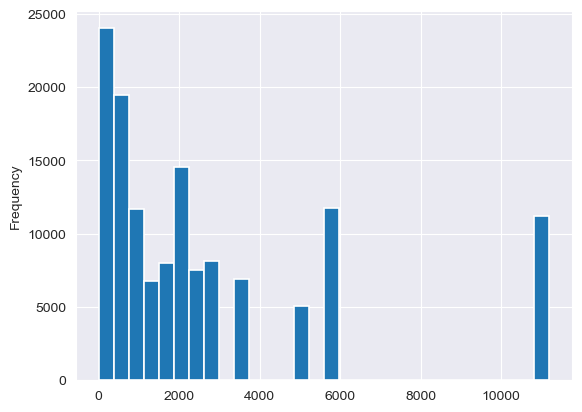

In [63]:
df_normalizada.TOTAL_INCIDENTES.plot.hist(bins=30, edgecolor='white', linewidth=1.2)